# **SIGLE SHOT DETECTOR**

É um detector de objetos de estágio único desenvolvido por https://arxiv.org/abs/1512.02325

Antecessor do YOLO. 


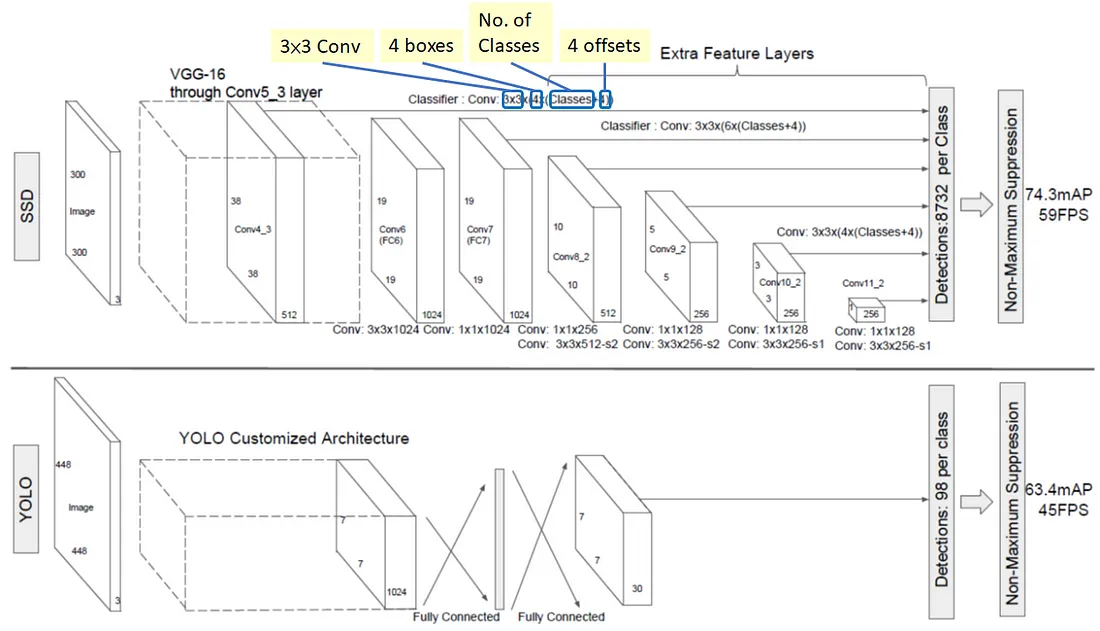

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Vamos usar modelos pré-treinados do https://github.com/datitran/object_detector_app/tree/master/object_detection

Usamos um modelo de tensorflow do modelo de detecção de objeto TensorFlow pode ser usado para detectar objetos de 90 classes:
http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz

Definição de gráfico de texto deve ser retirado de OpenCv_Extra:
https://github.com/opencv/opencv_extra/tree/master/testdata/dnn/ssd_mobilenet_v1_coco.pbtxt


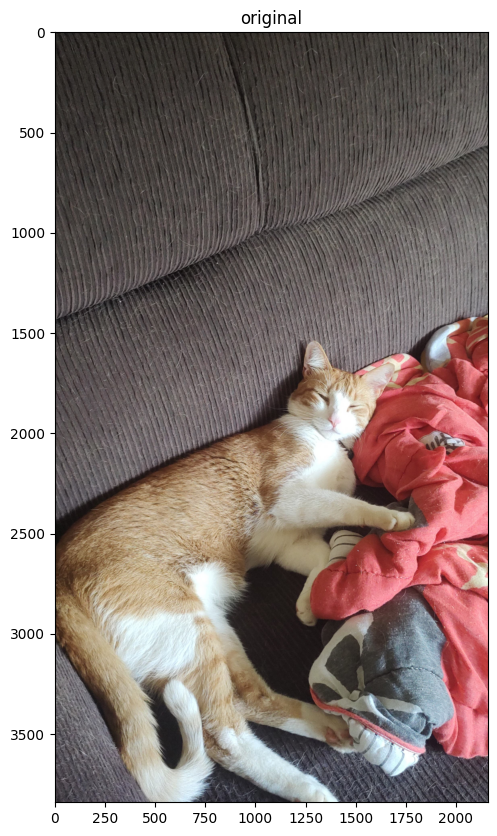

Rodando o SSD na imagem....
dog : 0.81008214
couch : 0.6604671


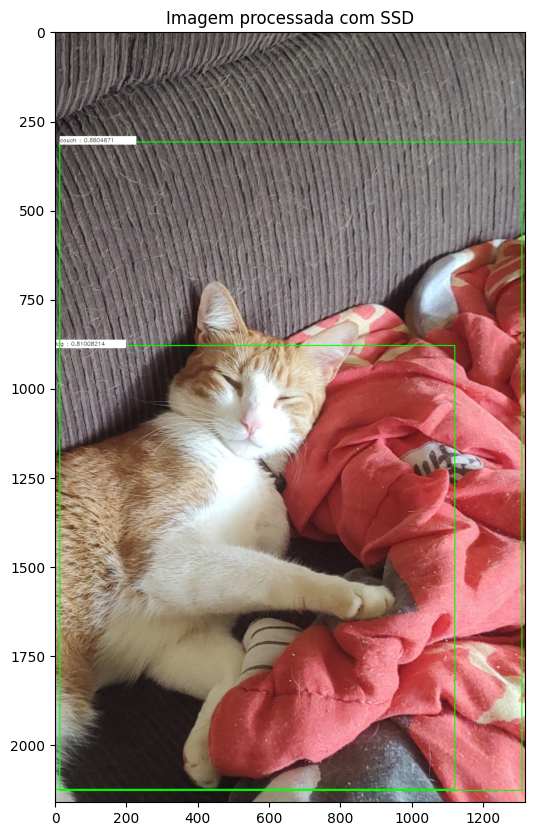

In [10]:
frame = cv2.imread('imagens/PatricioGatoNenudo.jpg')
imshow("original", frame)

print("Rodando o SSD na imagem....")
# Make a copy of our loaded image
image = frame.copy()
inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

inScaleFactor = 0.007843
meanVal = 127.5

prototxt = "ssd_mobilenet_v1_coco.pbtxt"
weights = "frozen_inference_graph.pb"

num_classes = 90

thr = 0.5

net = cv2.dnn.readNetFromTensorflow(weights, prototxt)

swapRB = True

className = { 0: 'background',
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
    7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
    18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
    32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
    56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
    80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
    86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush' }

blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB= swapRB)

net.setInput(blob)

detections = net.forward()

# Cortar imagem, se necessário pois não fizemos o redimensionamento na entrada. 
cols = frame.shape[1]
rows = frame.shape[0]

if cols / float(rows) > WHRatio:
    cropSize = (int(rows * WHRatio), rows)
else:
    cropSize = (cols, int(cols / WHRatio))

y1 = int((rows - cropSize[1]) / 2)
y2 = y1 + cropSize[1]
x1 = int((rows - cropSize[0]) / 2)
x2 = x1 + cropSize[0]

frame = frame[y1:y2, x1:x2]

cols = frame.shape[1]
rows = frame.shape[0]
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > thr:
        class_id = int(detections[0,0,i,1])
        xLeftBot = int(detections[0,0,i,3] * cols)
        yLeftBot = int(detections[0,0,i,4] * rows)
        xRightTop = int(detections[0,0,i,5] * cols)
        yRightTop = int(detections[0,0,i,6] * rows)

        cv2.rectangle(frame, (xLeftBot, yLeftBot), (xRightTop, yRightTop), (0, 255, 0), 2)

        if class_id in className:
            rotulo = className[class_id] + " : " + str(confidence)
            print(rotulo)
            labelSize, baseLine = cv2.getTextSize(rotulo, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)

            yLeftBot = max(yLeftBot, labelSize[1])

            cv2.rectangle(frame, (xLeftBot, yLeftBot - labelSize[1]), (xLeftBot + labelSize[0], yLeftBot + baseLine), (255, 255, 255),cv2.FILLED)

            cv2.putText(frame, rotulo, (xLeftBot, yLeftBot), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)



imshow("Imagem processada com SSD", frame)

